In [1]:
from fpl_helpers import *
import pandas as pd

In [2]:
elements_df, teams_df = get_tables()
global PLAYER_IDS
PLAYER_IDS = elements_df[['full_name', 'id']].set_index('full_name').to_dict()['id']


In [3]:
forwards = elements_df[(elements_df['minutes']>0) & (elements_df['element_type']==4)].sort_values(by='total_points', ascending=False)[PLAYER_COLS].head(20)
forwards['difficulty'] = forwards['full_name'].apply(lambda x: difficulty_range(PLAYER_IDS[x], end_gameweek=3, gwrange=1))
forwards[:10]

,full_name,team,selected_by_percent,now_cost,value_season,total_points,expected_goals,goals_scored,expected_assists,assists,expected_goals_conceded,goals_conceded,difficulty
437,Erling Haaland,Man City,91.9,141,2.8,39,4.54,6,0.18,1,2.70,2,"[3.0, 2.0, 2.0]"
426,Julián Álvarez,Man City,13.3,67,4.2,28,1.94,2,0.59,3,2.77,2,"[3.0, 2.0, 2.0]"
539,Taiwo Awoniyi,Nott'm Forest,4.5,66,3.8,25,1.83,3,0.29,1,5.30,4,"[2.0, 5.0, 3.0]"
145,Evan Ferguson,Brighton,7.7,60,4.2,25,2.56,4,0.11,0,5.50,4,"[4.0, 2.0, 3.0]"
129,Yoane Wissa,Brentford,16.6,62,3.9,24,2.46,2,0.08,1,4.20,5,"[4.0, 2.0, 2.0]"
265,Odsonne Edouard,Crystal Palace,2.4,55,4.4,24,2.49,3,0.24,0,3.83,3,"[3.0, 2.0, 4.0]"
356,Darwin Núñez Ribeiro,Liverpool,10.7,74,2.8,21,1.70,2,0.12,2,1.49,0,"[2.0, 2.0, 3.0]"
89,Dominic Solanke,Bournemouth,2.6,65,3.2,21,1.76,2,0.21,1,9.50,8,"[3.0, 3.0, 4.0]"
11,Eddie Nketiah,Arsenal,6.9,56,3.6,20,1.54,2,0.19,1,1.92,2,"[2.0, 3.0, 2.0]"
653,Michail Antonio,West Ham,5.5,61,3.1,19,0.95,2,0.35,0,4.94,1,"[5.0, 4.0, 2.0]"


In [4]:
compare_players(forwards[1:10]['full_name'], metrics=ATTACKER_METRICS, agg='mean')

,Julián Álvarez,Taiwo Awoniyi,Evan Ferguson,Yoane Wissa,Odsonne Edouard,Darwin Núñez Ribeiro,Dominic Solanke,Eddie Nketiah,Michail Antonio
Total Points,7.00,6.20,6.20,6.00,6.00,5.20,5.20,5.00,4.80
Goals Scored,0.50,0.80,1.00,0.50,0.80,0.50,0.50,0.50,0.50
Expected Goals,0.50,0.50,0.60,0.60,0.60,0.40,0.40,0.40,0.20
Assists,0.80,0.20,0.00,0.20,0.00,0.50,0.20,0.20,0.00
Expected Assists,0.10,0.10,0.00,0.00,0.10,0.00,0.10,0.00,0.10
Expected Goal Involvements,0.60,0.50,0.70,0.60,0.70,0.50,0.50,0.40,0.30
Bonus,1.00,0.80,0.80,1.20,1.00,0.80,0.50,0.50,1.00
Bps,29.00,24.80,25.80,17.50,20.50,18.50,14.50,16.00,17.20
Influence,29.00,30.60,37.00,21.00,30.20,20.30,25.80,16.80,21.40
Creativity,42.60,12.10,4.70,6.80,9.80,3.70,16.90,17.00,5.40


In [5]:
sterling = fetch_player_data(PLAYER_IDS["Raheem Sterling"])
salah = fetch_player_data(PLAYER_IDS["Mohamed Salah"])
son = fetch_player_data(PLAYER_IDS["Son Heung-min"])

In [6]:
pd.Series(data=[i['total_points'] for i in sterling['history_past']], index=[i['season_name'] for i in sterling['history_past']], name='Raheem Sterling')

2011/12      3
2012/13     82
2013/14    132
2014/15    158
2015/16     96
2016/17    149
2017/18    229
2018/19    234
2019/20    204
2020/21    154
2021/22    163
2022/23    101
Name: Raheem Sterling, dtype: int64

<Axes: title={'left': 'Total FPL points development for Sterling, Salah and Son'}, xlabel='Season', ylabel='Total FPL points'>

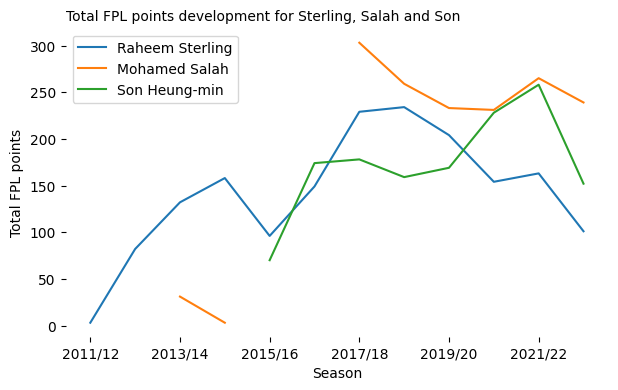

In [7]:

sterling_points = pd.Series(data=[i['total_points'] for i in sterling['history_past']], index=[i['season_name'] for i in sterling['history_past']], name='Raheem Sterling')
salah_points = pd.Series([i['total_points'] for i in salah['history_past']], index=[i['season_name'] for i in salah['history_past']], name='Mohamed Salah')
son_points = pd.Series([i['total_points'] for i in son['history_past']], index=[i['season_name'] for i in son['history_past']], name='Son Heung-min')

df = pd.concat([sterling_points, salah_points, son_points], axis=1)
ax = df.plot(figsize=(7,4))
format_chart(ax, ylabel='Total FPL points', xlabel='Season', title="Total FPL points development for Sterling, Salah and Son")

In [8]:
import pandas as pd


# Base path for the CSV files
dataframes = [] 
for i in ['2020-21', '2021-22', '2022-23']:
    dataframes.append(pd.read_csv(f'Fantasy-Premier-League/data/{i}/gws/' + 'merged_gw.csv'))
data = pd.concat(dataframes, keys=['2020-21', '2021-22', '2022-23'])
data = data.reset_index(level=0).rename(columns={'level_0': 'Season'})



In [9]:
#data = data.reset_index().head().rename(columns={'level_0':"Season"})
data

,Season,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,...,transfers_out,value,was_home,yellow_cards,GW,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,starts
0,2020-21,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,...,0,55,True,0,1,NaN,NaN,NaN,NaN,NaN
1,2020-21,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,...,0,50,True,0,1,NaN,NaN,NaN,NaN,NaN
2,2020-21,Aaron Mooy,MID,Brighton,0.0,0,0,0,0,0.0,...,0,50,True,0,1,NaN,NaN,NaN,NaN,NaN
3,2020-21,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,...,0,50,True,0,1,NaN,NaN,NaN,NaN,NaN
4,2020-21,Abdoulaye Doucouré,MID,Everton,1.3,0,0,20,1,44.6,...,0,55,False,0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26500,2022-23,Oliver Skipp,MID,Spurs,2.0,0,0,16,0,0.0,...,642,43,False,0,38,0.01,0.01,0.0,1.5,1.0
26501,2022-23,Ryan Sessegnon,DEF,Spurs,0.0,0,0,0,0,0.0,...,190,44,False,0,38,0.00,0.00,0.0,0.0,0.0
26502,2022-23,Ashley Young,DEF,Aston Villa,1.0,0,0,0,0,0.0,...,2668,43,True,0,38,0.00,0.00,0.0,0.0,0.0
26503,2022-23,Jeremy Sarmiento Morante,MID,Brighton,0.0,0,0,0,0,0.0,...,39,45,False,0,38,0.00,0.00,0.0,0.0,0.0


In [10]:
reduced = data[['name', 'total_points', 'GW', "Season"]]
reduced
#reduced[reduced['total_points']>15].set_index('name')['total_points'].sort_values().plot.barh(figsize=(5,10))

,name,total_points,GW,Season
0,Aaron Connolly,1,1,2020-21
1,Aaron Cresswell,1,1,2020-21
2,Aaron Mooy,0,1,2020-21
3,Aaron Ramsdale,1,1,2020-21
4,Abdoulaye Doucouré,3,1,2020-21
...,...,...,...,...
26500,Oliver Skipp,2,38,2022-23
26501,Ryan Sessegnon,0,38,2022-23
26502,Ashley Young,0,38,2022-23
26503,Jeremy Sarmiento Morante,0,38,2022-23


<Axes: title={'left': 'Big hauls (>15) last three seasons'}>

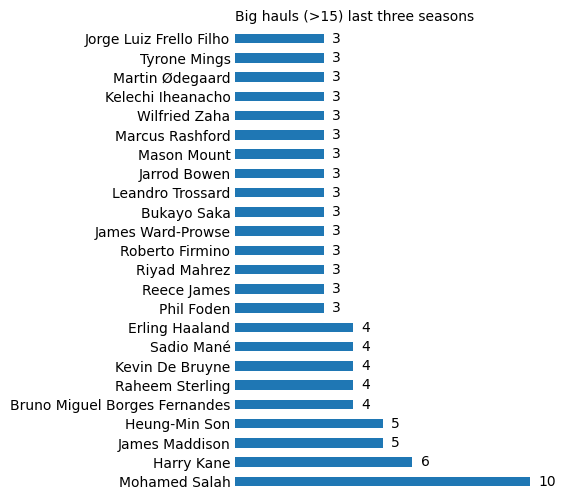

In [16]:
big_hauls = reduced[(reduced['total_points']>14)].set_index(['name', 'Season', 'GW']).sort_index()
big_hauls = big_hauls.reset_index()['name'].value_counts(ascending=False)
ax = big_hauls[big_hauls>2].plot.barh(figsize=(4,6))
ax = format_chart(ax, title="Big hauls (>15) last three seasons")
ax.bar_label(ax.containers[0], padding=6)
ax.tick_params(axis='y', length=0)
ax.get_xaxis().set_visible(False)
ax

<Axes: title={'left': 'Big hauls (>15) last season'}>

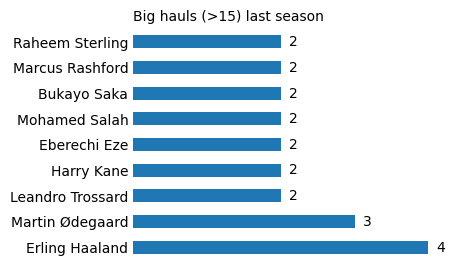

In [11]:
big_hauls = reduced[(reduced['total_points']>14) & (reduced['Season']=='2022-23')].set_index(['name', 'Season', 'GW']).sort_index()
big_hauls = big_hauls.reset_index()['name'].value_counts(ascending=False)
ax = big_hauls[big_hauls>1].plot.barh(figsize=(4,3))
ax = format_chart(ax, title="Big hauls (>15) last season")
ax.bar_label(ax.containers[0], padding=6)
ax.tick_params(axis='y', length=0)
ax.get_xaxis().set_visible(False)
ax